In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

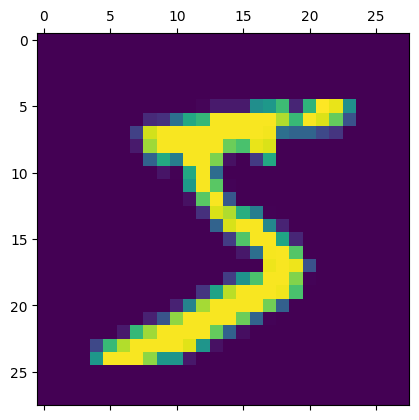

In [7]:
plt.matshow(X_train[0]);

In [8]:
y_train[0]

5

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
   
    keras.layers.Dense(100,activation='relu'),# 100 - number of hidden nurons(we get count based on trial and error)
  
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )


model.fit(X_train,y_train,epochs=11)



Epoch 1/11


1875/1875 [==============================] - 6s 3ms/step - loss: 0.6572 - accuracy: 0.8331
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.9056
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2886 - accuracy: 0.9183
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9270
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2363 - accuracy: 0.9337
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2181 - accuracy: 0.9391
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9431
Epoch 8/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9466
Epoch 9/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1782 - accuracy: 0.9501
Epoch 10/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9552


[0.15648910403251648, 0.9552000164985657]

In [14]:
y_predicted=model.predict(X_test)


np.argmax(y_predicted[2])

y_pred=[np.argmax(i) for i in y_predicted]
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


[7, 2, 1, 0, 4]

In [15]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    0,    3,    5,    1,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    3,    1,    7,    0],
       [   5,    4,  978,   10,    5,    2,    7,    8,   12,    1],
       [   0,    0,    8,  966,    1,   12,    0,   11,   10,    2],
       [   1,    0,    3,    1,  942,    0,   13,    3,    2,   17],
       [   8,    1,    0,   12,    1,  842,   10,    3,   10,    5],
       [  10,    3,    2,    0,    9,    8,  922,    0,    4,    0],
       [   1,    8,   18,    9,    3,    1,    0,  974,    0,   14],
       [   4,    4,    3,   16,    8,   11,    9,   10,  906,    3],
       [   8,    6,    1,    9,   28,    7,    0,   11,    4,  935]])>

Text(95.72222222222221, 0.5, 'Truth')

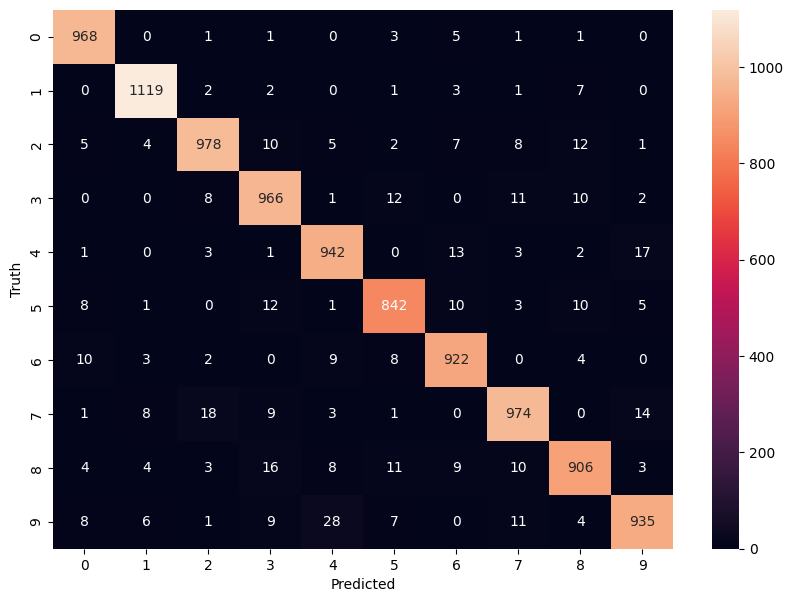

In [16]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')